# Segmenting a scene using the Fully Convolutional Network (FCN) model

In this recipe, you will learn how to perform semantic segmentation of an arbitrary image into 21 classes, such as person, car, and bird. This piece of functionality is useful when an understanding of a scene is required; for example, in augmented reality applications and for driver assistance. To know more visit https://arxiv.org/abs/1605.06211.

We use the VGG-based Fully Convolution Network approach for per-pixel scene segmentation. The model supports 21 classes. The model is quite time consuming and inference might take up a significant amount of CPU time, so be patient.

Before you proceed with this recipe, you need to install the OpenCV 3.x Python API package.
Download model weights from http://dl.caffe.berkeleyvision.org/fcn8s-heavy-pascal.caffemodel and save the file into the data folder.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


------  ../data/scenetext01.jpg--    Shape(600, 800, 3) frame: uint8
[[203 172 193] [137 118 135] [60 62 72] [49 77 77] [ 47 102  93] [ 44 120 102] [ 51 137 113] ]


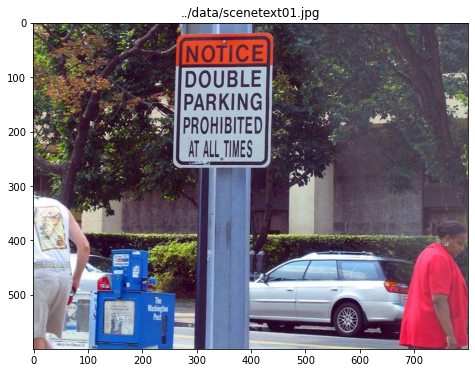

In [2]:
frame = cv2.imread('../data/scenetext01.jpg')



###################################################################
print_image('../data/scenetext01.jpg','frame',frame,0,1,0,7)
plt_view_image(plt,[["../data/scenetext01.jpg",frame[:,:,[2,1,0]] ]],figsize=(15,6),axis='on',cmap='gray')

In [3]:
blob = cv2.dnn.blobFromImage(frame, 1, (frame.shape[1],frame.shape[0]))

model = cv2.dnn.readNetFromCaffe('../data/fcn8s-heavy-pascal.prototxt',
                                 '../data/fcn8s-heavy-pascal.caffemodel')

model.setInput(blob)
output = model.forward()
print(output.shape)

(1, 21, 600, 800)


In [4]:
labels = output[0].argmax(0)
print(labels.shape)



#####################################################
print("labels ==", np.unique(labels.flatten()))
print_image('labels','labels',labels,40,49,370,390)
print_image('labels','labels',labels,456,464,680,700)

(600, 800)
labels == [ 0  5  7  9 15]
------  labels-------------------    Shape(600, 800) labels: int64
[ 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 ]
[ 0 0 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 9 9 9 ]
[ 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 ]
[ 0 0 0 0 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 ]
[ 0 0 0 9 9 9 9 9 9 5 5 5 5 5 5 5 5 5 5 5 ]
[ 0 0 0 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 ]
[ 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 ]
[ 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 ]
[ 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 ]
------  labels-------------------    Shape(600, 800) labels: int64
[ 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 15 15 ]
[ 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 15 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 15 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 15 15 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 15 15 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 7 7 7 7 7 15 15 15 15 15 15 ]
[ 7 7 7 7 7 7 7 7 7 7 7 7 7 7 15 15 15 15 15 15 ]


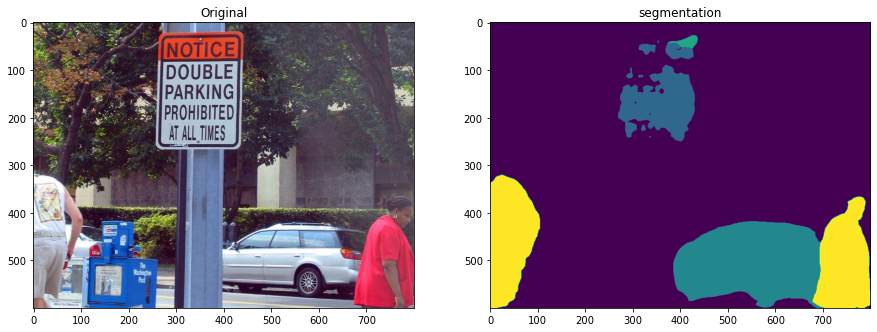

In [5]:
plt_view_image(plt,[["Original",frame[:,:,[2,1,0]]],
                    ["segmentation",labels]
                   ],
               figsize=(15,6), axis='on', cmap='' )